**Level 1**

I Import my libraries That I will use for the Project

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import geopandas as gdp
import folium

**Task 1**

Task: Data Exploration and preprocessing


I did a Data Exploration and preprocessing

In [ ]:
df = pd.read_csv(r'/content/Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**Function to clean text columns and ensure they are free from all extra symbols**

In [ ]:
import re
def clean_text(text):
  if isinstance(text, str):
    text = re.sub(r'[^\w\s,]', '', text)
    return text.strip()
  return text

text_columns = ["Restaurant Name", "Address", "Locality", "Locality Verbose", "Cuisines", "Currency"]
for col in text_columns:
  df[col] = df[col].apply(clean_text)

df["Cuisines"].fillna("Unknown", inplace=True)
df.head()


/tmp/ipython-input-3119287747.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cuisines"].fillna("Unknown", inplace=True)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana PulaP,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana PulaP,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat Edsa ShangriLa,162,Mandaluyong City,"Edsa ShangriLa, 1 Garden Way, Ortigas, Mandalu...","Edsa ShangriLa, Ortigas, Mandaluyong City","Edsa ShangriLa, Ortigas, Mandaluyong City, Man...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana PulaP,Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana PulaP,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana PulaP,Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**I Explore the dataset and identify the number of rows and columns**

In [ ]:
df.shape

(9551, 21)

**I Check for missing values in each column and handle them accordingly**

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

for col in df.columns:
  if df[col].dtype == 'object':
    df[col].fillna(df[col].mode()[0], inplace=True)
  elif df[col].dtype in ['int64', 'float64']:
    df[col].fillna(df[col].mean(), inplace=True)

missing_values_after = df.isnull().sum()
missing_values_after

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


/tmp/ipython-input-89446106.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-89446106.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


**I Perform data type conversion and Analyze the distribution of the target variable("Aggregate rating")and identify any class imbalances**

In [ ]:
try:

    df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')



except KeyError:
    print("'Aggregate rating' column not found in DataFrame.")



df['Aggregate rating'].fillna(df['Aggregate rating'].mean(), inplace=True)



class_counts =  df ['Aggregate rating'].value_counts()

print("\nClass Counts: \n", class_counts)


Class Counts: 
 Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


/tmp/ipython-input-1699272506.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Aggregate rating'].fillna(df['Aggregate rating'].mean(), inplace=True)


**I Plot class distribution of Aggregate rating**

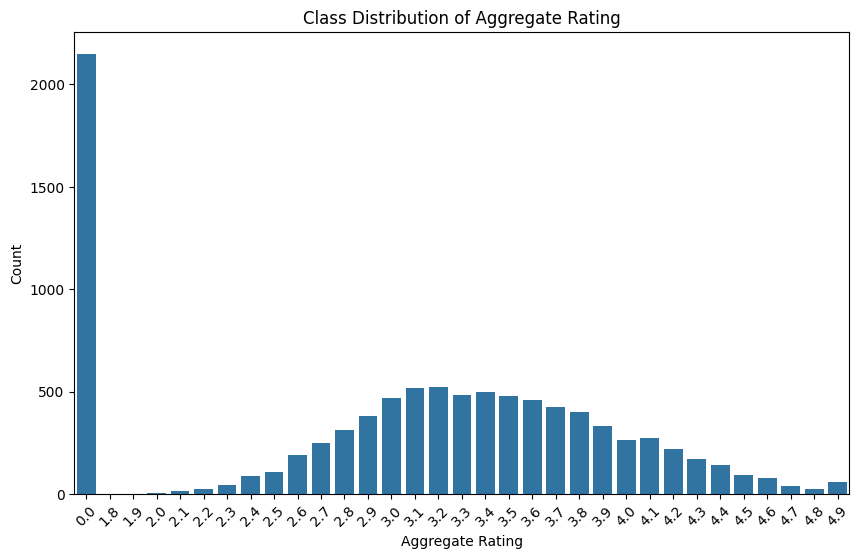

In [5]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Aggregate rating', data=df)

plt.title('Class Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

In [ ]:
class_counts = df['Aggregate rating'].value_counts()
class_percentages = (class_counts / len(df)) * 100
print("\nClass Percentages:\n", class_percentages)


Class Percentages:
 Aggregate rating
0.0    22.489792
3.2     5.465396
3.1     5.433986
3.4     5.214114
3.3     5.057062
3.5     5.025652
3.0     4.900010
3.6     4.795309
3.7     4.470736
3.8     4.188043
2.9     3.989111
3.9     3.507486
2.8     3.298084
4.1     2.868810
4.0     2.785049
2.7     2.617527
4.2     2.313894
2.6     1.999791
4.3     1.821799
4.4     1.507696
2.5     1.151712
4.5     0.994660
2.4     0.910899
4.6     0.816668
4.9     0.638677
2.3     0.492095
4.7     0.439745
2.2     0.282693
4.8     0.261753
2.1     0.157052
2.0     0.073291
1.9     0.020940
1.8     0.010470
Name: count, dtype: float64


**Task 2**

**Descriptive Analysis**

**I Calculate basic statistical measures(mean,median,standard deviation, etc.for numerical columns.**

In [ ]:
columns_to_analyze = ['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']
for col in columns_to_analyze:
  if col in df.columns:
    print(f"\nStatistics for {col}:")
    print(df[col].describe())
    print("Median:", df[col].median())
  else:
    print(f"Column '{col}' not found in the DataFrame.")


Statistics for Average Cost for two:
count      9551.000000
mean       1199.210763
std       16121.183073
min           0.000000
25%         250.000000
50%         400.000000
75%         700.000000
max      800000.000000
Name: Average Cost for two, dtype: float64
Median: 400.0

Statistics for Price range:
count    9551.000000
mean        1.804837
std         0.905609
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Price range, dtype: float64
Median: 2.0

Statistics for Aggregate rating:
count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64
Median: 3.2

Statistics for Votes:
count     9551.000000
mean       156.909748
std        430.169145
min          0.000000
25%          5.000000
50%         31.000000
75%        131.000000
max      10934.000000
Name: Votes, dtype: float6

**I Explore the distribution of categorical variables like "Country Code, ""City",and"Cuisines. "Identify the top cuisines and cities with the highest number of restaurants**

In [ ]:
print("\nCountry Code Distribution:\n", df['Country Code'].value_counts())
print("\nCity Distribution:\n", df['City'].value_counts())
print("\nCuisines Distribution:\n", df['Cuisines'].value_counts())

top_cuisines = df['Cuisines'].value_counts().head(10)
print("\nTop 10 Cuisines:\n", top_cuisines)
top_cities = df['City'].value_counts().head(10)
print("\nTop 10 Cities:\n", top_cities)


Country Code Distribution:
 Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64

City Distribution:
 City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lakes Entrance       1
Mohali               1
Panchkula            1
Bandung              1
Randburg             1
Name: count, Length: 141, dtype: int64

Cuisines Distribution:
 Cuisines
North Indian                          936
North Indian, Chinese                 511
Chinese                               354
Fast Food                             354
North Indian, Mughlai                 334
                                     ... 
World Cuisine, Patisserie, Cafe         1
Burger, Izgara                          1
Desserts, B�_rek                        1
Restaurant Cafe, Turki

**Task 3**

**Task:Geospatial Analysis**

**I Visualize the locations of restaurants on a map using latitude and longitude information.**

In [ ]:
import folium

map_centre = [df['Latitude'].mean(), df['Longitude'].mean()]
my_map = folium.Map(location=map_centre, zoom_start=5)

for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name']
    ).add_to(my_map)

my_map

Output hidden; open in https://colab.research.google.com to view.

**I Analyze the distribution of restaurants across different cities or countries.**

In [ ]:
city_counts = df.groupby('City')['Restaurant ID'].count().sort_values(ascending=False)

print("\nRestaurant Distribution by City:\n", city_counts)

country_counts = df.groupby('City')['Restaurant ID'].count()

print("\nRestauranr Distribution by Country:\n", country_counts)


Restaurant Distribution by City:
 City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Trentham East          1
Weirton                1
Vineland Station       1
Winchester Bay         1
Yorkton                1
Name: Restaurant ID, Length: 141, dtype: int64

Restauranr Distribution by Country:
 City
Abu Dhabi          20
Agra               20
Ahmedabad          21
Albany             20
Allahabad          20
                   ..
Weirton             1
Wellington City    20
Winchester Bay      1
Yorkton             1
��stanbul          14
Name: Restaurant ID, Length: 141, dtype: int64


**Determine if there is any correlation between the restaurants location and its rating.**


Correlation Matrix:
                   Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


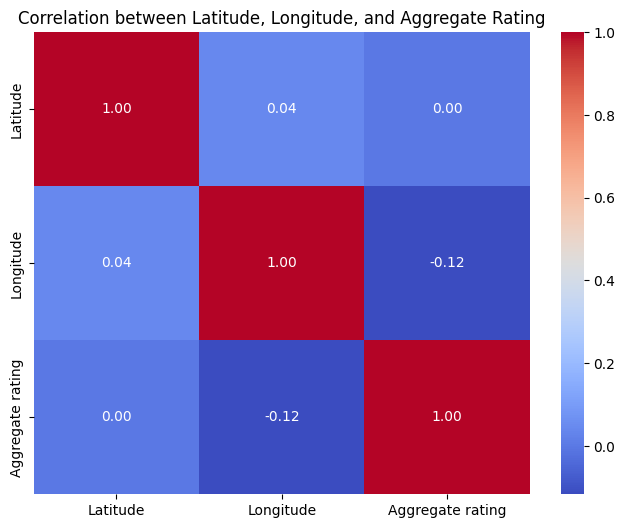

In [ ]:
correlation_matrix = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print("\nCorrelation Matrix:\n",correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Latitude, Longitude, and Aggregate Rating')
plt.show()

**Level 2**

**I Import my libries That I will use for the Project**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import geopandas as gdp
import folium

In [ ]:
df = pd.read_csv(r'/content/Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
